📁**FUTUREINTERNS DATA SCIENCE AND ANALYTICS TASK 3**
--
College Event Feedback Analysis-Internship Project📊
---

**FUTURE_DS_03 - INTERNSHIP TASK - 3 BY AKASH.V**

📦Install & Import All Required Libraries
---

In [ ]:
# Install TextBlob if not already installed
!pip install textblob

# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import numpy as np

# Set seaborn style
sns.set(style='whitegrid')

📂Load Your Dataset
--

In [ ]:
# Upload your dataset (use the file picker in Colab)
from google.colab import files
uploaded = files.upload()

# Load the CSV
df = pd.read_csv("/content/student_feedback_events.csv")  # Replace with exact filename if needed
df.head()


Saving student_feedback_events.csv to student_feedback_events (1).csv


,Student ID,Event Type,Department,Rating,Feedback,Sentiment
0,S001,Workshop,CSE,5,Amazing workshop! Very engaging and useful.,negative
1,S002,Seminar,ECE,4,Good speaker but the seminar felt too long.,neutral
2,S003,Cultural,MECH,2,Too loud and disorganized event.,neutral
3,S004,Workshop,EEE,5,Well-structured and informative session.,positive
4,S005,Seminar,IT,3,"Slides were confusing, needs improvement.",neutral


👀Data Cleaning & Viewing
--

In [ ]:
# Check info and missing values
print("Dataset Info:")
print(df.info())

print("\nMissing Values:\n")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Ensure 'Rating' column is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student ID  180 non-null    object
 1   Event Type  180 non-null    object
 2   Department  180 non-null    object
 3   Rating      180 non-null    int64 
 4   Feedback    180 non-null    object
 5   Sentiment   180 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.6+ KB
None

Missing Values:

Student ID    0
Event Type    0
Department    0
Rating        0
Feedback      0
Sentiment     0
dtype: int64


🛠️Sentiment Analysis using TextBlob
--

In [ ]:
# If 'Sentiment' not in your data or needs recalculation:
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Feedback'].apply(get_sentiment)

# Show count
df['Sentiment'].value_counts()


,count
Sentiment,
neutral,74
positive,71
negative,35


📊Visualization of Sentiment Distribution
---

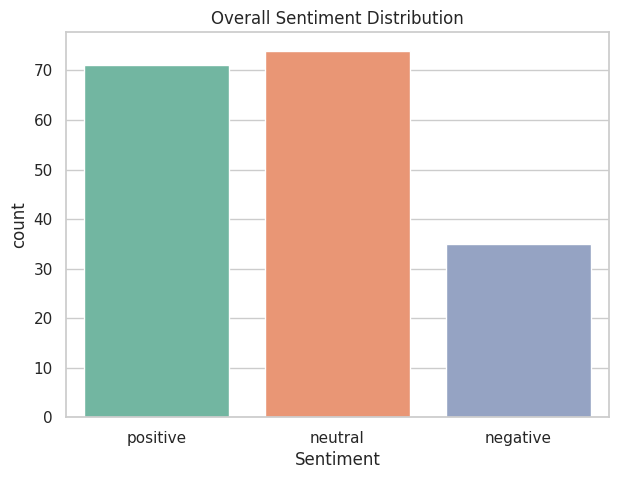

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Sentiment', palette='Set2', hue='Sentiment', legend=False)
plt.title("Overall Sentiment Distribution")
plt.show()

💬Top 3 Most-Liked Events (Based on Average Rating)
---

Average Rating by Event Type:
 Event Type
Workshop    3.542373
Seminar     2.935484
Cultural    2.576271
Name: Rating, dtype: float64


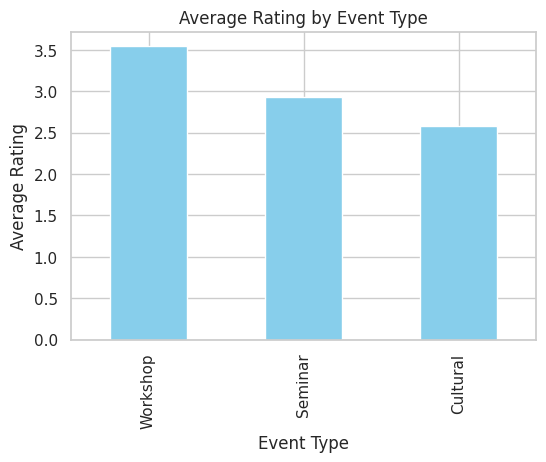

In [ ]:
top_events = df.groupby('Event Type')['Rating'].mean().sort_values(ascending=False)
print("Average Rating by Event Type:\n", top_events)

plt.figure(figsize=(6,4))
top_events.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Event Type")
plt.ylabel("Average Rating")
plt.show()


🏢Department-wise Satisfaction
---

Average Rating by Department:
 Department
EEE      3.300000
MECH     3.266667
CSE      3.222222
IT       3.000000
ECE      2.870968
CIVIL    2.483871
Name: Rating, dtype: float64


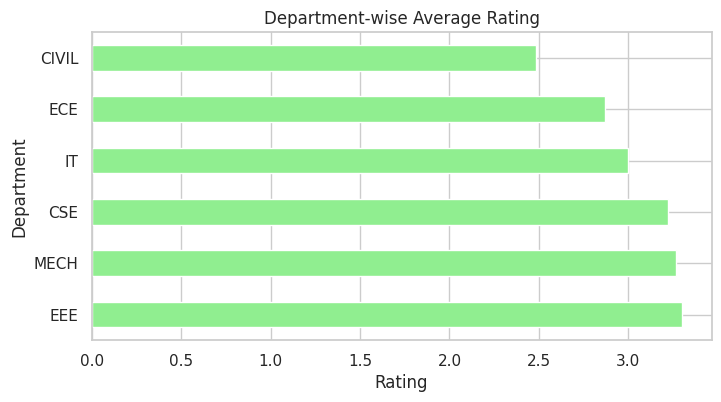

In [ ]:
dept_rating = df.groupby('Department')['Rating'].mean().sort_values(ascending=False)
print("Average Rating by Department:\n", dept_rating)

plt.figure(figsize=(8,4))
dept_rating.plot(kind='barh', color='lightgreen')
plt.title("Department-wise Average Rating")
plt.xlabel("Rating")
plt.ylabel("Department")
plt.show()


🔗Correlation between Ratings and Event Type
---

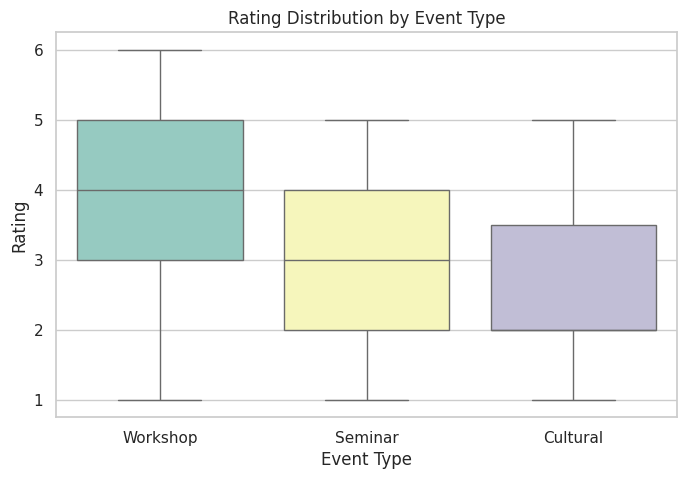

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Event Type', y='Rating', palette='Set3', hue='Event Type', legend=False)
plt.title("Rating Distribution by Event Type")
plt.show()

🚫Word Cloud for Negative feedbacks & Common Complaints
---

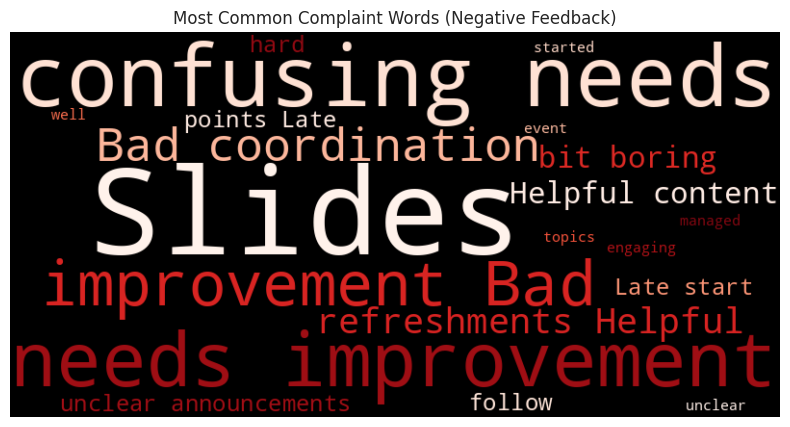

In [ ]:
# Filter only negative feedbacks
negative_feedback = df[df['Sentiment'] == 'negative']['Feedback'].str.cat(sep=' ')

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black',
                      stopwords=STOPWORDS, colormap='Reds').generate(negative_feedback)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Complaint Words (Negative Feedback)")
plt.show()


💚Word Cloud for Positive feedbacks
---

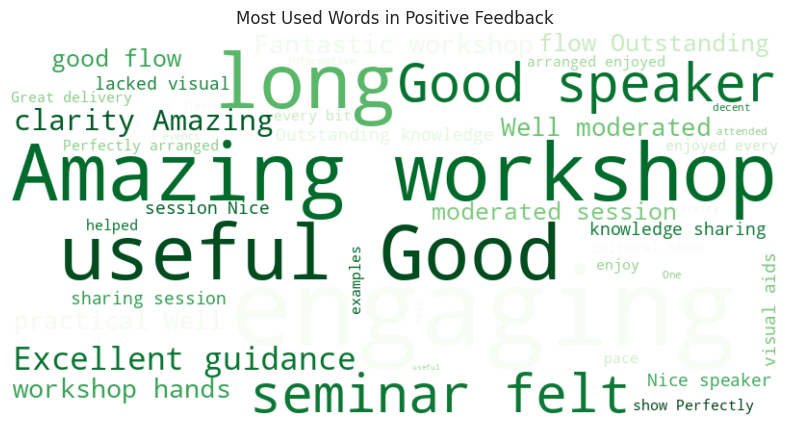

In [ ]:
# Filter only positive feedbacks
positive_feedback = df[df['Sentiment'] == 'positive']['Feedback'].str.cat(sep=' ')

# Generate word cloud
wordcloud_positive = WordCloud(width=800, height=400,
                               background_color='white',
                               stopwords=STOPWORDS,
                               colormap='Greens').generate(positive_feedback)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Most Used Words in Positive Feedback")
plt.show()


✅ Conclusion – What I Learned with this project(Internship)
--

As a DATA SCIENCE AND ANALYTICS INTERN at FUTUREINTERNS, I learned how to clean and analyze real-world feedback data using Python.
I performed sentiment analysis using TextBlob and visualized insights through charts and word clouds.
I explored patterns in student satisfaction across events and departments using ratings and text feedback.
This enhanced my skills in data storytelling, NLP, and creating data-driven recommendations.
Overall, I understood how data science can be used to meaningfully improve campus experiences. Thank you!!!